# Analyzing Automotive Incidents

Within this report we will take a closer look at a more localized dataset of automobile incidents occurring with pedestrians.  From the report we would like to as to what traits and conditions that accidents seem to happen most often. We will start by looking at a breakdown, per year, to see if the issue is something that is reduced from year to year as changes in the automotive industry are applied. From there we will dig in a little more in daily conditions to find out if accidents are more likely to happen depending on the time of day, or what the weather conditions may be.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd. read_csv("ped_crashes.csv")
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [3]:
# To start I will remove some of the unnecessary columns of information such as City or Township, Crash: Intersection, Gender, etc
df.drop(['City or Township', 'Crash: Intersection', 'Party Type', 'Person Gender'], axis = 1, inplace = True)

In [4]:
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Person Age
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),DOB invalid
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),44
2,2018,February,1,11:00 AM - 12:00 noon,Thursday,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),DOB invalid
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),DOB invalid
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Hit-and-run,Daylight,Snow,25,No injury (O),DOB invalid


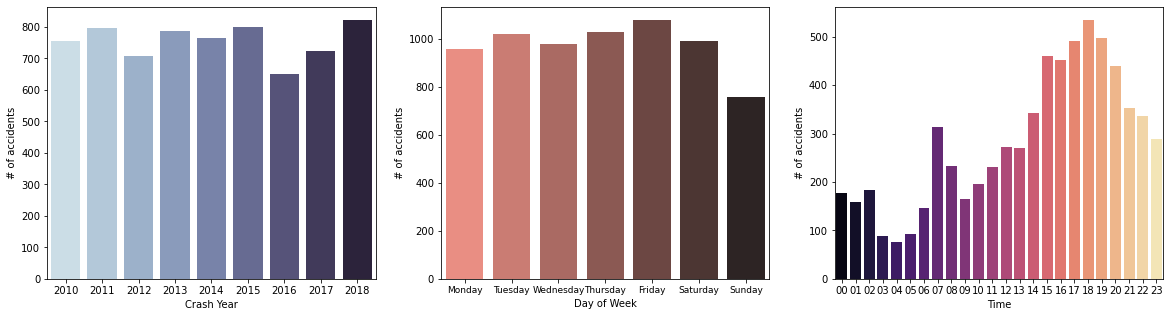

In [5]:
#Given the table above, we will gain some initial information.

#Create a table of graph over Year, Day, and Time of Day
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

#Year
sns.set_palette("ch:s = .25,rot = -.25",9)
sns.countplot(x = df["Crash Year"], ax = ax[0])
ax[0].set(ylabel = '# of accidents')

#Weekday
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
b=sns.countplot(x = df["Day of Week"], order = days, ax = ax[1], palette = 'dark:salmon_r')
b.set_xticklabels(b.get_xticklabels(), size = 9)
ax[1].set(ylabel = '# of accidents')

#Time of Day
df['Time of Day'] = df['Time of Day'].str.replace('midnight','AM')
df['Time of Day'] = df['Time of Day'].str.replace('noon','PM')

df2 = pd.DataFrame(columns = ['Time'])
df2['Time'] = df['Time of Day'].astype(str).str[0:8]
df2.drop(df2[(df2['Time'] == 'Unknown')].index, inplace=True)

df2['Time'] = pd.to_datetime(df2['Time']).dt.strftime('%H')
sns.countplot(x = df2["Time"].sort_values(), ax = ax[2], palette = 'magma')
ax[2].set(ylabel = '# of accidents')
textvar = fig.text(0, 0, '')

Taking a look at the information above, we can see that as years have gone by, there hasn't been any considerable drop in incidents that are occuring.  However, in 2016 there was a decrease that slowly came back up in the following years.  Things like this could be due to a decrease in drivers or even pedestrians because of sickness or economical conditions at the time.

Looking at the second graph, there isn't much difference in the number of accidents that are being caused on a day to day basis. Friday, does show a slight uptick that could probably be assumed from families getting out to celebrate the oncoming weekend.  
Sunday does show a significant decrease in accidents that could be encouraged by different Sunday events, such as Church or families preparing for the soon-to-come workweek.

And finally taking a look at the time of day in which these incidents are occuring, we can see that the peak of accidents occur around 18:00 or 6:00pm.  This could be due to workers being adjourned for the day and people starting their commute home.  It is also worth mentioning that at 7:00am there is also a spike in which accidents occur.  This could be the inverse of that 6:00pm issue, where workers are starting to make their way in for their workdays.

### Conditional elements of Accidents

##### Clean dataset for further investigation

In [6]:
#Weather conditions are only recorded in years 2016 and later
#I will also change the name of the column in Weather Conditions for ease of use, as well as only having information
#post-dating 2016

df.drop(df.loc[df['Crash Year'] <= 2016].index, inplace = True)
df.rename(columns = {'Weather Conditions (2016+)': 'Weather Conditions'}, inplace = True)

In [7]:
#Remove rows where DoB is not listed

df.drop(df.loc[df['Person Age'] == 'DOB invalid'].index, inplace = True)

In [8]:
#Remove rows where Speed limit was not ascertained

df.drop(df.loc[df['Speed Limit at Crash Site'] == 'Uncoded & errors'].index, inplace = True)

In [9]:
#Now we will combine Crash Year, Crash Month, and Crash Day to get one clean DateTime Column

cols=['Crash Year', 'Crash Month', 'Crash Day']
df['Date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

#We can then drop the previous 3 columns, as to prevent redundant data
df.drop(['Crash Year', 'Crash Month', 'Crash Day'], axis = 1, inplace = True)

In [10]:
df.sample(10)

,Time of Day,Day of Week,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Person Age,Date
1381,10:00 PM - 11:00 PM,Thursday,Not hit-and-run,Dark lighted,Clear,25,Suspected serious injury (A),22,2017-November-23
1353,10:00 PM - 11:00 PM,Tuesday,Not hit-and-run,Dark lighted,Clear,30,No injury (O),37,2017-August-22
1300,3:00 PM - 4:00 PM,Wednesday,Not hit-and-run,Daylight,Clear,45,Possible injury (C),76,2017-December-20
876,8:00 PM - 9:00 PM,Monday,Not hit-and-run,Dark lighted,Clear,30,No injury (O),66,2017-October-2
605,5:00 PM - 6:00 PM,Monday,Not hit-and-run,Daylight,Clear,35,Possible injury (C),38,2018-April-23
1164,2:00 PM - 3:00 PM,Tuesday,Hit-and-run,Daylight,Clear,40,No injury (O),43,2017-November-14
597,12:00 PM - 1:00 PM,Friday,Not hit-and-run,Daylight,Cloudy,55,No injury (O),49,2018-February-23
334,6:00 PM - 7:00 PM,Tuesday,Not hit-and-run,Dark lighted,Clear,35,Possible injury (C),44,2018-November-13
974,7:00 PM - 8:00 PM,Tuesday,Not hit-and-run,Dark lighted,Rain,35,Suspected minor injury (B),71,2017-February-7
71,7:00 PM - 8:00 PM,Monday,Not hit-and-run,Dark lighted,Clear,30,Fatal injury (K),76,2018-December-3


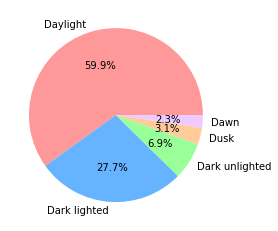

In [11]:
#Accidents under different lighting conditinos

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#EDCAFF','#c76f9a']
df.drop(df.loc[df['Lighting Conditions'] == 'Unknown'].index, inplace = True)
data = df['Lighting Conditions'].value_counts(normalize=True) * 100
plt.pie(data, labels = data.index, autopct='%.1f%%',colors=colors)
textvar = fig.text(0, 0, '')

Contrary to what my original hypothesis was, it seems that most incidents are occuring during the day time.  Vision impairment wouldn't seem to be an issue in these accidents, aside from potentially having the sun in your eyes at a given point of time during the day.

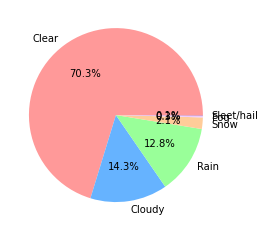

In [12]:
#Accidents occuring under different weather conditions

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#EDCAFF','#c76f9a']
df.drop(df.loc[df['Weather Conditions'] == 'Unknown'].index, inplace = True)
data = df['Weather Conditions'].value_counts(normalize=True) * 100
plt.pie(data, labels = data.index, autopct='%.1f%%',colors=colors)
textvar = fig.text(0, 0, '')

Continuing the pattern of contradicting our original hypothesis, it would seem that most incidents are actually occuring in clear weather a vast majority of the time. 70% of accidents happen during clear weather versus the 15% that would occur during inclement weather such as rain or snow.

In [13]:
df.count()

Time of Day                  935
Day of Week                  935
Crash: Hit-and-Run           935
Lighting Conditions          935
Weather Conditions           935
Speed Limit at Crash Site    935
Worst Injury in Crash        935
Person Age                   935
Date                         935
dtype: int64

In [14]:
df['Lighting Conditions'].value_counts()['Dark lighted']

257

In [15]:
df['Weather Conditions'].value_counts()['Rain']

120

In [16]:
df['Weather Conditions'].value_counts()['Snow']

20

In [17]:
df.describe()

,Time of Day,Day of Week,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Person Age,Date
count,935,935,935,935,935,935,935,935,935
unique,24,7,2,5,6,13,5,77,515
top,6:00 PM - 7:00 PM,Tuesday,Not hit-and-run,Daylight,Clear,25,Possible injury (C),29,2018-October-9
freq,86,158,847,562,657,276,332,28,7


In [18]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Lighting Conditions'] = label_encoder.fit_transform(df['Lighting Conditions'])
print(df.head())

         Time of Day Day of Week Crash: Hit-and-Run  Lighting Conditions  \
1  7:00 PM - 8:00 PM    Thursday        Hit-and-run                    0   
5  1:00 PM - 2:00 PM      Sunday        Hit-and-run                    3   
6  8:00 AM - 9:00 AM     Tuesday    Not hit-and-run                    3   
7  3:00 PM - 4:00 PM     Tuesday    Not hit-and-run                    3   
8  3:00 PM - 4:00 PM     Tuesday    Not hit-and-run                    3   

  Weather Conditions Speed Limit at Crash Site         Worst Injury in Crash  \
1              Clear                        30  Suspected serious injury (A)   
5              Clear                        25           Possible injury (C)   
6              Clear                        45           Possible injury (C)   
7              Clear                        35    Suspected minor injury (B)   
8              Clear                        30    Suspected minor injury (B)   

  Person Age             Date  
1         44  2018-February-1 

In [20]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Weather Conditions'] = label_encoder.fit_transform(df['Weather Conditions'])
print(df.head())

         Time of Day Day of Week Crash: Hit-and-Run  Lighting Conditions  \
1  7:00 PM - 8:00 PM    Thursday        Hit-and-run                    0   
5  1:00 PM - 2:00 PM      Sunday        Hit-and-run                    3   
6  8:00 AM - 9:00 AM     Tuesday    Not hit-and-run                    3   
7  3:00 PM - 4:00 PM     Tuesday    Not hit-and-run                    3   
8  3:00 PM - 4:00 PM     Tuesday    Not hit-and-run                    3   

   Weather Conditions Speed Limit at Crash Site         Worst Injury in Crash  \
1                   0                        30  Suspected serious injury (A)   
5                   0                        25           Possible injury (C)   
6                   0                        45           Possible injury (C)   
7                   0                        35    Suspected minor injury (B)   
8                   0                        30    Suspected minor injury (B)   

  Person Age             Date  
1         44  2018-Febru

In [21]:
df

,Time of Day,Day of Week,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Person Age,Date
1,7:00 PM - 8:00 PM,Thursday,Hit-and-run,0,0,30,Suspected serious injury (A),44,2018-February-1
5,1:00 PM - 2:00 PM,Sunday,Hit-and-run,3,0,25,Possible injury (C),27,2018-April-1
6,8:00 AM - 9:00 AM,Tuesday,Not hit-and-run,3,0,45,Possible injury (C),22,2018-May-1
7,3:00 PM - 4:00 PM,Tuesday,Not hit-and-run,3,0,35,Suspected minor injury (B),18,2018-May-1
8,3:00 PM - 4:00 PM,Tuesday,Not hit-and-run,3,0,30,Suspected minor injury (B),20,2018-May-1
...,...,...,...,...,...,...,...,...,...
1539,1:00 PM - 2:00 PM,Thursday,Not hit-and-run,3,0,25,Suspected minor injury (B),19,2017-August-31
1540,6:00 AM - 7:00 AM,Tuesday,Not hit-and-run,0,1,40,Suspected serious injury (A),30,2017-October-31
1541,5:00 PM - 6:00 PM,Tuesday,Not hit-and-run,4,1,25,Suspected serious injury (A),16,2017-October-31
1542,10:00 AM - 11:00 AM,Tuesday,Not hit-and-run,3,0,35,Possible injury (C),22,2017-October-31


In [35]:
from scipy import stats
r, p = stats.pearsonr(df['Lighting Conditions'], df['Weather Conditions'])
print(round(r, 4))
print(round(p, 8))

-0.1775
5e-08


In [43]:
corr_df = pd.DataFrame(columns = ['r', 'p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = stats. pearsonr(df['Lighting Conditions'], df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 5)]
    
corr_df

,r,p
Lighting Conditions,1.000,0.0
Weather Conditions,-0.177,0.0
